# Imports

In [1]:
# Utility
import pandas as pd
import numpy as np
import joblib

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

# Read Data

In [7]:
df = pd.read_csv('..\datasets\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].unique()

array([0, 1], dtype=int64)

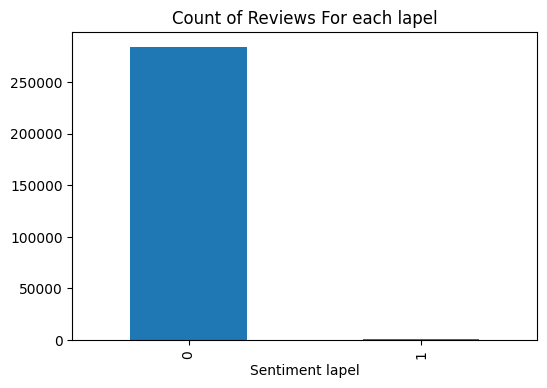

In [9]:
ax = df['Class'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews For each lapel',
          figsize=(6, 4))
ax.set_xlabel('Sentiment lapel')
plt.show()

*The dataset is highly unbalanced*

In [13]:
print('Number of Positive Class: ', len(df[df['Class'] == 1]))
print('Number of Nigative Class: ', len(df[df['Class'] == 0]))

Number of Positive Class:  492
Number of Nigative Class:  284315


**Tuning the dataset**

In [15]:
df_0 = df[df['Class'] == 0].sample(500)
df = df[df['Class'] == 1]
df = pd.concat([df, df_0], ignore_index=True)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,88076.973790,-2.365150,1.793184,-3.509207,2.237459,-1.592971,-0.614483,-2.789894,0.311045,-1.293062,...,0.349337,-0.008341,-0.016415,-0.023929,0.036871,0.021278,0.087149,0.029698,110.592268,0.495968
std,47892.021097,5.507287,3.702201,6.193557,3.221866,4.206532,1.856609,5.829188,4.853653,2.314577,...,2.788208,1.161980,1.160769,0.567332,0.658488,0.474316,1.005467,0.414279,254.984731,0.500236
min,406.000000,-30.552380,-10.632097,-31.103685,-4.664803,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.384706,-4.781606,-1.172688,-7.263482,-1.869290,0.000000,0.000000
25%,46792.750000,-2.867222,-0.180453,-5.068323,-0.178231,-1.801381,-1.572363,-3.103817,-0.187756,-2.296972,...,-0.179820,-0.556078,-0.238703,-0.373302,-0.299283,-0.290137,-0.066794,-0.064935,1.577500,0.000000
50%,79675.000000,-0.878216,0.967209,-1.445752,1.301843,-0.417048,-0.641428,-0.714355,0.191680,-0.713888,...,0.145640,0.021302,-0.034798,0.020573,0.072204,-0.027801,0.046272,0.027637,19.995000,0.000000
75%,134962.750000,1.081412,2.793742,0.317952,4.202830,0.459296,0.133881,0.258665,0.921007,0.105515,...,0.655130,0.534189,0.191035,0.390381,0.402648,0.310032,0.455390,0.208837,99.990000,1.000000
max,172186.000000,2.362908,22.057729,3.288225,12.114672,11.095089,8.510324,11.696888,20.007208,6.538707,...,27.202839,8.361985,5.466230,1.434526,2.208209,2.745261,3.052358,1.779364,3180.000000,1.000000


*We deleted row with class(0) So the the twe classes is close in lenght*

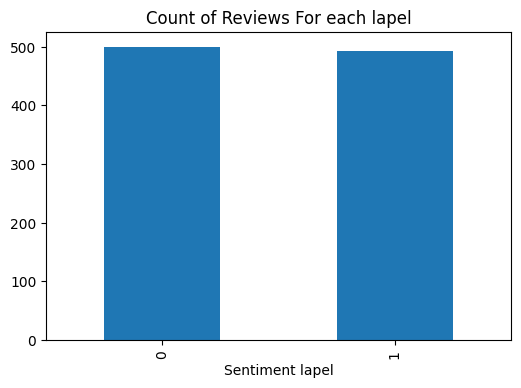

In [16]:
ax = df['Class'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews For each lapel',
          figsize=(6, 4))
ax.set_xlabel('Sentiment lapel')
plt.show()

*Now the Dataset is palanced*

## Prepare data for model training

### Data Scaling

In [17]:
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.831520,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.433940,1
1,-1.830141,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.641741,1
2,-1.746787,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.507493,1
3,-1.694058,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.202437,1
4,-1.682924,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.430016,1


### Split data to input/output

In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Train/Test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Models Traing

## Logistic Regression

In [24]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions
y_pred = lg.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9346733668341709
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       106
           1       0.97      0.89      0.93        93

    accuracy                           0.93       199
   macro avg       0.94      0.93      0.93       199
weighted avg       0.94      0.93      0.93       199



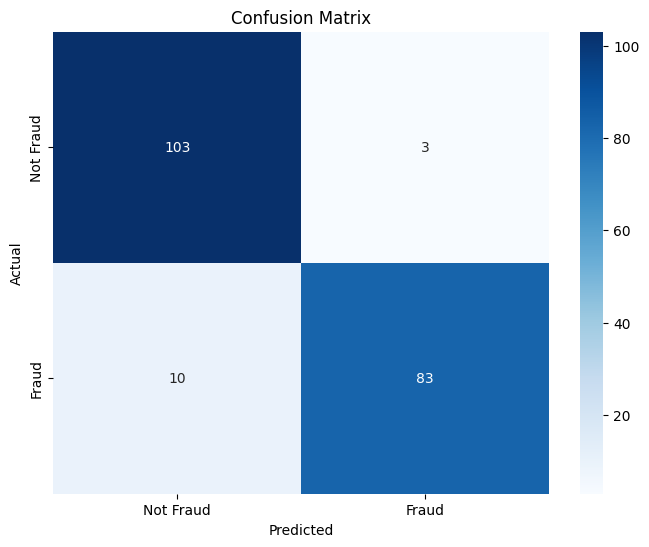

In [26]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SVM

In [27]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [28]:
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [29]:
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [30]:
# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9296482412060302
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       106
           1       0.98      0.87      0.92        93

    accuracy                           0.93       199
   macro avg       0.94      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



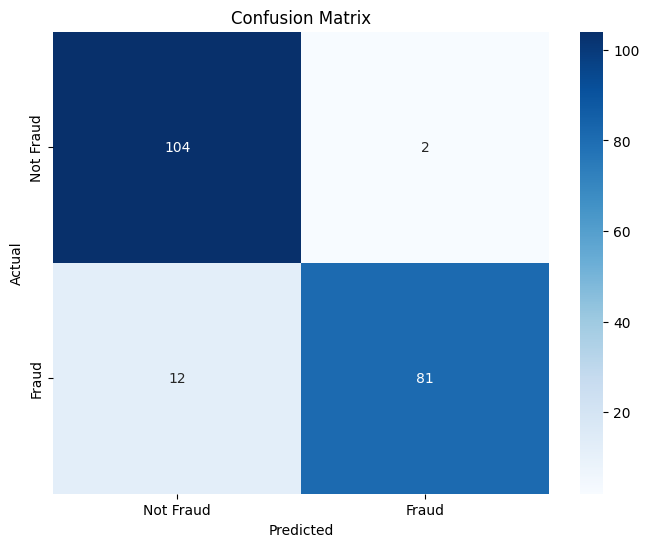

In [33]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9195979899497487
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       106
           1       0.94      0.88      0.91        93

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.92      0.92      0.92       199



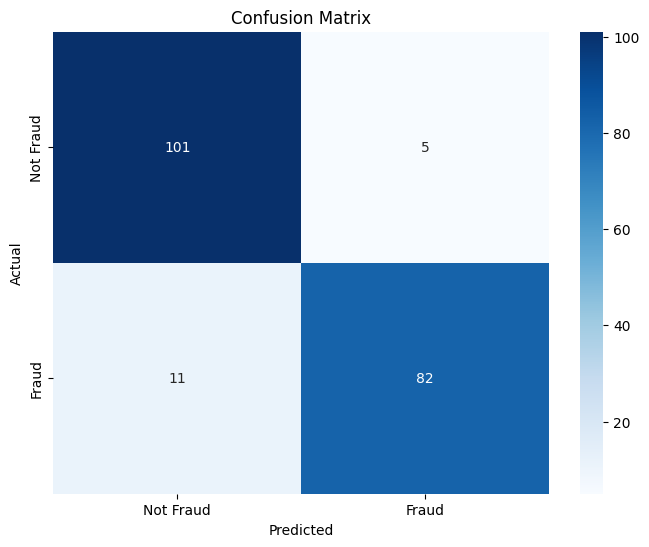

In [48]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Nural Network Model

In [36]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)


In [37]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 3s 17ms/step - loss: 0.6860 - accuracy: 0.5975 - val_loss: 0.4135 - val_accuracy: 0.7375
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5377 - accuracy: 0.6760 - val_loss: 0.3186 - val_accuracy: 0.9125
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4304 - accuracy: 0.7714 - val_loss: 0.2542 - val_accuracy: 0.9500
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3864 - accuracy: 0.8205 - val_loss: 0.2114 - val_accuracy: 0.9875
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3633 - accuracy: 0.8387 - val_loss: 0.1806 - val_accuracy: 0.9875
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3325 - accuracy: 0.8794 - val_loss: 0.1533 - val_accuracy: 0.9875
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2620 - accuracy: 0.8948 - val_loss: 0.1284 - val_accuracy: 0.9875
Epoch 8/100


In [40]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 0s 5ms/step - loss: 0.3246 - accuracy: 0.9246
Test Loss: 0.3246400058269501
Test Accuracy: 0.9246231317520142


In [41]:
# Make predictions
y_pred = model.predict(X_test)


7/7 [==============================] - 0s 2ms/step


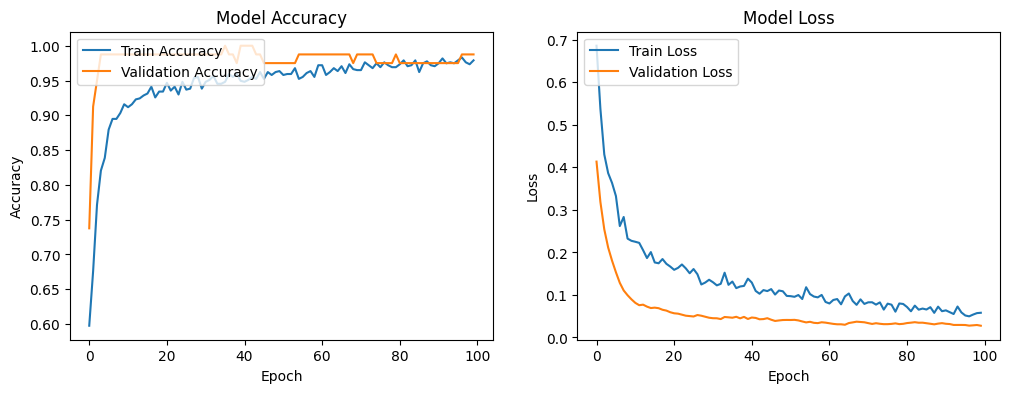

In [42]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

In [43]:
threshhold = 0.5
y_pred = np.where(np.abs(y_pred) < threshhold, 0, 1)

In [44]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9246231155778895
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       106
           1       0.95      0.88      0.92        93

    accuracy                           0.92       199
   macro avg       0.93      0.92      0.92       199
weighted avg       0.93      0.92      0.92       199



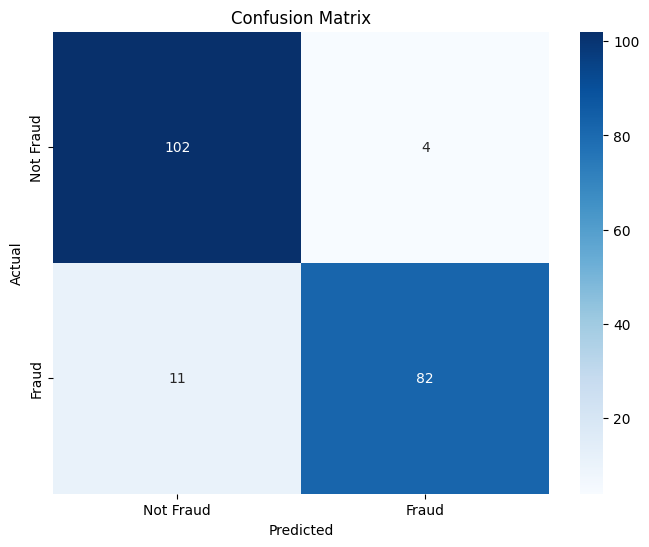

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compare Models

| **Model**| **Accuracy** | **False Nigative** |
| --- | --- | --- |
| Logistic Regression | 0.93 | 10 |
| Random Forest | 0.92 | 11 |
| Support Vector Machine | 0.93 | 12 |
| Nural Network | 0.92 | 11 |


# Save model

In [49]:
# Save the Scaler
joblib.dump(scaler, 'fraud_scaler.joblib')

# Save the model
joblib.dump(lg, 'fraud_lg_model.joblib')

['fraud_lg_model.joblib']